In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('DATASET.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42657 entries, 0 to 42656
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOAN_DUR               42657 non-null  float64
 1   CUSTOMER_ID            42657 non-null  float64
 2   LOAN_TYPE              42657 non-null  object 
 3   LOAN_STATUS            42657 non-null  object 
 4   LOAN_BEHAVIOR          42657 non-null  object 
 5   TYPE_CARD              42657 non-null  object 
 6   MCC_CODE               42657 non-null  int64  
 7   SEC                    42657 non-null  object 
 8   CAR_OWN                42657 non-null  int64  
 9   INCOME_SOURCE          42657 non-null  object 
 10  LOC                    42657 non-null  object 
 11  ECOZONE                42657 non-null  int64  
 12  HOME_OWNER_INDICATOR   42657 non-null  int64  
 13  TOT_POP                42657 non-null  int64  
 14  AMENITIES              42657 non-null  int64  
 15  AV

,LOAN_DUR,CUSTOMER_ID,MCC_CODE,CAR_OWN,ECOZONE,HOME_OWNER_INDICATOR,TOT_POP,AMENITIES,AVE_ADB,BANK_TENURE,LOAN_AMOUNT,TRANSACTION_AMOUNT,PRINCIPAL_LOAN_AMOUNT,MONTHLY_INCOME,INTEREST_EARNED
count,42657.000000,4.265700e+04,42657.000000,42657.000000,42657.000000,42657.0,4.265700e+04,42657.000000,4.265700e+04,42657.000000,4.265700e+04,4.265700e+04,4.265700e+04,4.265700e+04,42657.000000
mean,4.283882,7.210732e+07,5741.397238,0.501137,101.894132,1.0,1.137538e+07,220.629369,1.569681e+06,12.410924,1.397103e+06,9.892902e+03,1.114471e+06,1.708340e+06,0.178642
std,3.817042,4.169675e+07,982.640508,0.500005,79.331364,0.0,4.009298e+06,119.951283,1.023906e+07,6.961234,4.001162e+06,4.742315e+04,3.682701e+06,5.345366e+06,0.562595
min,0.075000,7.213000e+04,0.000000,0.000000,1.000000,1.0,1.797660e+06,12.000000,-4.565127e+03,-1.860000,-1.890000e+00,-3.410000e+00,-1.780000e+00,3.281720e+03,-3.570000
25%,2.030556,3.560075e+07,5399.000000,0.000000,23.000000,1.0,7.954723e+06,89.000000,2.368067e+04,6.890000,1.099996e+05,7.643600e+02,8.357095e+04,1.237184e+05,-0.127692
50%,3.044444,7.305819e+07,5722.000000,1.000000,61.000000,1.0,1.348446e+07,288.000000,1.258504e+05,11.250000,6.000001e+05,2.039715e+03,3.689614e+05,3.313155e+05,0.170000
75%,5.072222,1.091260e+08,5946.000000,1.000000,189.000000,1.0,1.348446e+07,327.000000,7.310232e+05,17.210000,1.389500e+06,5.594570e+03,1.031538e+06,9.999993e+05,0.493333
max,30.438889,1.428263e+08,9405.000000,1.000000,189.000000,1.0,1.619504e+07,327.000000,3.127550e+08,32.250000,1.000000e+08,3.000000e+06,9.409108e+07,1.217176e+08,3.370000


In [25]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [26]:
target = ['LOAN_AMOUNT', 'INTEREST_EARNED', 'BANK_TENURE']
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

print("Target Variable:", target)
print("Feature Columns:", features)
X.head(), y.head()

Target Variable: ['LOAN_AMOUNT', 'INTEREST_EARNED', 'BANK_TENURE']
Feature Columns: ['LOAN_DUR', 'CUSTOMER_ID', 'LOAN_TYPE', 'LOAN_STATUS', 'LOAN_BEHAVIOR', 'TYPE_CARD', 'MCC_CODE', 'SEC', 'CAR_OWN', 'INCOME_SOURCE', 'LOC', 'ECOZONE', 'HOME_OWNER_INDICATOR', 'TOT_POP', 'AMENITIES', 'AVE_ADB', 'BANK_TENURE', 'LOAN_AMOUNT', 'TRANSACTION_AMOUNT', 'PRINCIPAL_LOAN_AMOUNT', 'MONTHLY_INCOME', 'INTEREST_EARNED']


(   LOAN_DUR   CUSTOMER_ID       LOAN_TYPE LOAN_STATUS          LOAN_BEHAVIOR  \
 0  3.044444  6.503887e+07  Personal Loans      Active                Current   
 1  3.044444  1.257860e+08  Personal Loans      Active                Current   
 2  3.052778  5.824484e+07  Manpower Loans      Active                Current   
 3  3.044444  9.493517e+07  Personal Loans      Active                Current   
 4  3.044444  1.089973e+08             MTL      Active  Amortization Past Due   
 
      TYPE_CARD  MCC_CODE SEC  CAR_OWN INCOME_SOURCE  ... HOME_OWNER_INDICATOR  \
 0  Credit Card      5651  C1        0        SALARY  ...                    1   
 1  Credit Card      4112   A        1    COMMISSION  ...                    1   
 2   Debit Card      6012  B2        1        SALARY  ...                    1   
 3  Credit Card      7997  B2        0      BUSINESS  ...                    1   
 4  Credit Card      5200  B1        0      BUSINESS  ...                    1   
 
     TOT_POP  AMEN

## Feature Engineering

In [27]:
# Debt Ratio
df['Debt_Ratio'] = df['LOAN_AMOUNT'] / df['MONTHLY_INCOME']

# Loan-to-Income Ratio
df['Loan_to_Income_Ratio'] = df['LOAN_AMOUNT'] / df['MONTHLY_INCOME']

# Income to Average Daily Balance Ratio
df['Income_to_ADB_Ratio'] = df['MONTHLY_INCOME'] / df['AVE_ADB']

# Update features list to include engineered features
engineered_features = ['Debt_Ratio', 'Loan_to_Income_Ratio', 'Income_to_ADB_Ratio']
features.extend(engineered_features)

In [28]:
# Business Type using Transacted MCC_CODES
def industry_type(MCC_CODE):
    if 1 <= MCC_CODE <= 1499:
        return 'Agriculture Services'
    elif 1500 <= MCC_CODE <= 2999:
        return 'Contracted Services'
    elif 3000 <= MCC_CODE <= 3299:
        return 'Airlines'
    elif 3300 <= MCC_CODE <= 3499:
        return 'Car Rental'
    elif 3500 <= MCC_CODE <= 3999:
        return 'Lodging' 
    elif 4000 <= MCC_CODE <= 4799:
        return 'Transportation Services'
    elif 4800 <= MCC_CODE <= 4999:
        return 'Utility Services' 
    elif 5000 <= MCC_CODE <= 5599:
        return 'Retail Outlet Services'
    elif 5600 <= MCC_CODE <= 5699:
        return 'Clothing Stores' 
    elif 5700 <= MCC_CODE <= 7299:
        return 'Miscellaneous Stores'
    elif 7300 <= MCC_CODE <= 7999:
        return 'Business Services' 
    elif 8000 <= MCC_CODE <= 8999:
        return 'Professional Services and Membership Organization' 
    elif 9000 <= MCC_CODE <= 9999:
        return 'Government Services' 
    else:
        return 'Other'
    
df['TRAN_IND'] = df['MCC_CODE'].apply(industry_type)
categorical_cols = ['LOAN_TYPE', 'LOAN_STATUS', 'LOAN_BEHAVIOR', 'TYPE_CARD', 'SEC', 'INCOME_SOURCE', 'LOC', 'TRAN_IND']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42657 entries, 0 to 42656
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOAN_DUR               42657 non-null  float64
 1   CUSTOMER_ID            42657 non-null  float64
 2   LOAN_TYPE              42657 non-null  object 
 3   LOAN_STATUS            42657 non-null  object 
 4   LOAN_BEHAVIOR          42657 non-null  object 
 5   TYPE_CARD              42657 non-null  object 
 6   MCC_CODE               42657 non-null  int64  
 7   SEC                    42657 non-null  object 
 8   CAR_OWN                42657 non-null  int64  
 9   INCOME_SOURCE          42657 non-null  object 
 10  LOC                    42657 non-null  object 
 11  ECOZONE                42657 non-null  int64  
 12  HOME_OWNER_INDICATOR   42657 non-null  int64  
 13  TOT_POP                42657 non-null  int64  
 14  AMENITIES              42657 non-null  int64  
 15  AV

,LOAN_DUR,CUSTOMER_ID,LOAN_TYPE,LOAN_STATUS,LOAN_BEHAVIOR,TYPE_CARD,MCC_CODE,SEC,CAR_OWN,INCOME_SOURCE,...,BANK_TENURE,LOAN_AMOUNT,TRANSACTION_AMOUNT,PRINCIPAL_LOAN_AMOUNT,MONTHLY_INCOME,INTEREST_EARNED,Debt_Ratio,Loan_to_Income_Ratio,Income_to_ADB_Ratio,TRAN_IND
0,3.044444,6.503887e+07,Personal Loans,Active,Current,Credit Card,5651,C1,0,SALARY,...,4.70,99999.422500,2442.67000,97144.622500,75787.57,-0.327500,1.319470,1.319470,8.812308,Clothing Stores
1,3.044444,1.257860e+08,Personal Loans,Active,Current,Credit Card,4112,A,1,COMMISSION,...,11.86,850000.076667,21694.80000,468359.291667,1273220.04,0.306667,0.667599,0.667599,1.413316,Transportation Services
2,3.052778,5.824484e+07,Manpower Loans,Active,Current,Debit Card,6012,B2,1,SALARY,...,5.96,34000.055833,1081.50875,28337.200833,94168.57,0.135833,0.361055,0.361055,13.947366,Miscellaneous Stores
3,3.044444,9.493517e+07,Personal Loans,Active,Current,Credit Card,7997,B2,0,BUSINESS,...,11.96,165000.238333,260.49500,143488.158333,88194.56,0.488333,1.870866,1.870866,2.017715,Business Services
4,3.044444,1.089973e+08,MTL,Active,Amortization Past Due,Credit Card,5200,B1,0,BUSINESS,...,17.08,889998.520000,358.95000,96137.330000,150000.91,-1.360000,5.933287,5.933287,141.567721,Retail Outlet Services


In [29]:
# Update X to include new features
X = df[features]

## Cleaning

In [30]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# Check for infinity values and replace them with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values in numerical columns with the maximum value of each column
for col in X.select_dtypes(include=[np.number]).columns:
    X[col].fillna(X[col].max(), inplace=True)


categorical_cols = ['LOAN_TYPE', 'LOAN_STATUS', 'LOAN_BEHAVIOR', 'TYPE_CARD', 'SEC', 'INCOME_SOURCE', 'LOC']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical columns
    ])

X_processed = preprocessor.fit_transform(X)

X_processed.shape

/var/folders/dd/vs7lmt4x54lgfqpc6lf2t0z80000gn/T/ipykernel_25330/2161924496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/dd/vs7lmt4x54lgfqpc6lf2t0z80000gn/T/ipykernel_25330/2161924496.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].max(), inplace=Tr

(42657, 60)

In [31]:
scale_features = ['LOAN_AMOUNT', 'TRANSACTION_AMOUNT', 'PRINCIPAL_LOAN_AMOUNT', 'MONTHLY_INCOME', 'LOAN_DUR', 
                  'AVE_ADB', 'BANK_TENURE', 'INTEREST_EARNED']
scaler = RobustScaler()
df[scale_features] = scaler.fit_transform(df[scale_features])

df.head()

,LOAN_DUR,CUSTOMER_ID,LOAN_TYPE,LOAN_STATUS,LOAN_BEHAVIOR,TYPE_CARD,MCC_CODE,SEC,CAR_OWN,INCOME_SOURCE,...,BANK_TENURE,LOAN_AMOUNT,TRANSACTION_AMOUNT,PRINCIPAL_LOAN_AMOUNT,MONTHLY_INCOME,INTEREST_EARNED,Debt_Ratio,Loan_to_Income_Ratio,Income_to_ADB_Ratio,TRAN_IND
0,0.00000,6.503887e+07,Personal Loans,Active,Current,Credit Card,5651,C1,0,SALARY,...,-0.634690,-0.390778,0.083424,-0.286736,-0.291605,-0.801094,1.319470,1.319470,8.812308,Clothing Stores
1,0.00000,1.257860e+08,Personal Loans,Active,Current,Credit Card,4112,A,1,COMMISSION,...,0.059109,0.195389,4.069199,0.104854,1.074889,0.220066,0.667599,0.667599,1.413316,Transportation Services
2,0.00274,5.824484e+07,Manpower Loans,Active,Current,Debit Card,6012,B2,1,SALARY,...,-0.512597,-0.442360,-0.198378,-0.359321,-0.270629,-0.055017,0.361055,0.361055,13.947366,Miscellaneous Stores
3,0.00000,9.493517e+07,Personal Loans,Active,Current,Credit Card,7997,B2,0,BUSINESS,...,0.068798,-0.339976,-0.368353,-0.237849,-0.277446,0.512593,1.870866,1.870866,2.017715,Business Services
4,0.00000,1.089973e+08,MTL,Active,Amortization Past Due,Credit Card,5200,B1,0,BUSINESS,...,0.564922,0.226650,-0.347969,-0.287799,-0.206914,-2.463666,5.933287,5.933287,141.567721,Retail Outlet Services


In [32]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((34125, 60), (8532, 60), (34125, 3), (8532, 3))

## KNN + Random Forest
KNN to cater first time users 
Rf to cater with existing relationships to the bank


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': [5, 10, 20, 50, 100]}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

print("Best Parameters for KNeighborsRegressor:", knn_grid.best_params_)


Best Parameters for KNeighborsRegressor: {'n_neighbors': 5}


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
from sklearn import preprocessing
def predict_loan(customer_data):
    if  customer_data['CUSTOMER_ID'] not in df['CUSTOMER_ID'].values:
        customer_data = pd.get_dummies(customer_data, columns = categorical_cols)
        customer_data[numerical_cols] = scaler.transform(customer_data[numerical_cols])
        return best_knn.predict(customer_data)
    else:
        return rf_model.predict(customer_data)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set using both models
knn_predictions = best_knn.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics for KNeighborsRegressor
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_predictions)

print("KNeighborsRegressor Performance:")
print("Mean Absolute Error (MAE):", knn_mae)
print("Mean Squared Error (MSE):", knn_mse)
print("Root Mean Squared Error (RMSE):", knn_rmse)
print("R² Score:", knn_r2)

# Calculate evaluation metrics for RandomForestRegressor
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandomForestRegressor Performance:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R² Score:", rf_r2)


KNeighborsRegressor Performance:
Mean Absolute Error (MAE): 0.09597404002303463
Mean Squared Error (MSE): 0.05553859709581272
Root Mean Squared Error (RMSE): 0.23566628332413767
R² Score: 0.937036140531836

RandomForestRegressor Performance:
Mean Absolute Error (MAE): 0.0024754261324502615
Mean Squared Error (MSE): 0.00046481284736849844
Root Mean Squared Error (RMSE): 0.02155951871838744
R² Score: 0.9992383478927903


In [62]:
X_train.head()

,LOAN_DUR,CUSTOMER_ID,LOAN_TYPE,LOAN_STATUS,LOAN_BEHAVIOR,TYPE_CARD,MCC_CODE,SEC,CAR_OWN,INCOME_SOURCE,...,AVE_ADB,BANK_TENURE,LOAN_AMOUNT,TRANSACTION_AMOUNT,PRINCIPAL_LOAN_AMOUNT,MONTHLY_INCOME,INTEREST_EARNED,Debt_Ratio,Loan_to_Income_Ratio,Income_to_ADB_Ratio
2,0.002740,5.824484e+07,Manpower Loans,Active,Current,Debit Card,6012,B2,1,SALARY,...,-0.168375,-0.512597,-0.442360,-0.198378,-0.359321,-0.270629,-0.055017,0.361055,0.361055,13.947366
3,0.000000,9.493517e+07,Personal Loans,Active,Current,Credit Card,7997,B2,0,BUSINESS,...,-0.116125,0.068798,-0.339976,-0.368353,-0.237849,-0.277446,0.512593,1.870866,1.870866,2.017715
5,-0.501370,8.517872e+07,Personal Loans,Active,Current,Credit Card,6011,B2,0,SALARY,...,-0.111465,-0.525194,-0.418131,3.867994,-0.334386,-0.257871,1.325764,0.617009,0.617009,2.241133
6,0.667580,1.001281e+08,Auto,Active,Current,Debit Card,6300,A,1,ALLOWANCE,...,-0.125457,-0.199612,0.008753,-0.323934,-0.242478,-0.039999,-0.475021,2.063017,2.063017,7.983592
8,-0.333333,1.249339e+08,Personal Loans,Active,Current,Credit Card,5815,C2,0,ALLOWANCE,...,-0.138997,-0.602713,-0.418132,-0.396278,-0.321790,-0.345894,0.885632,2.303738,2.303738,1.024830


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34125, 60), (8532, 60), (34125, 3), (8532, 3))

Mean CV Score (MSE): 0.0699
Standard Deviation of CV Score: 0.0097


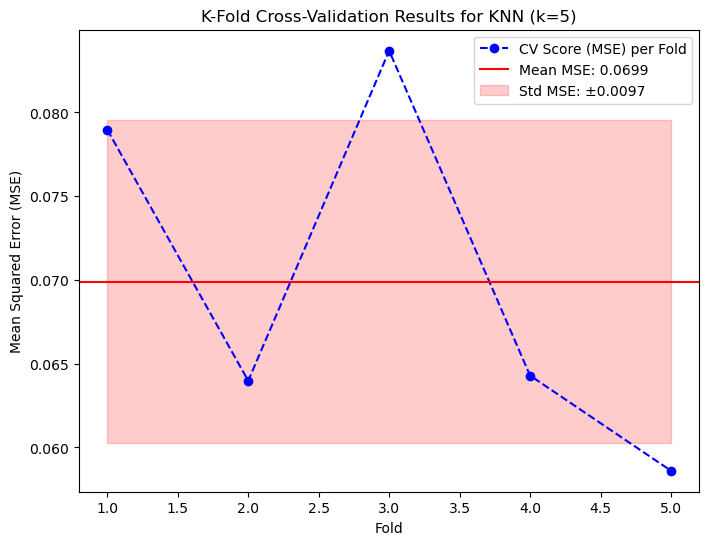

In [72]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Perform K-Fold Cross-Validation
k = 5  # Number of folds
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for interpretation
cv_scores = np.abs(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the results
print(f"Mean CV Score (MSE): {mean_cv_score:.4f}")
print(f"Standard Deviation of CV Score: {std_cv_score:.4f}")

# Plotting the cross-validation scores for each fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, k+1), cv_scores, marker='o', linestyle='--', color='b', label="CV Score (MSE) per Fold")
plt.axhline(y=mean_cv_score, color='r', linestyle='-', label=f"Mean MSE: {mean_cv_score:.4f}")
plt.fill_between(range(1, k+1), 
                 mean_cv_score - std_cv_score, 
                 mean_cv_score + std_cv_score, 
                 color='r', alpha=0.2, label=f"Std MSE: ±{std_cv_score:.4f}")

plt.title(f"K-Fold Cross-Validation Results for KNN (k={k})")
plt.xlabel("Fold")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()



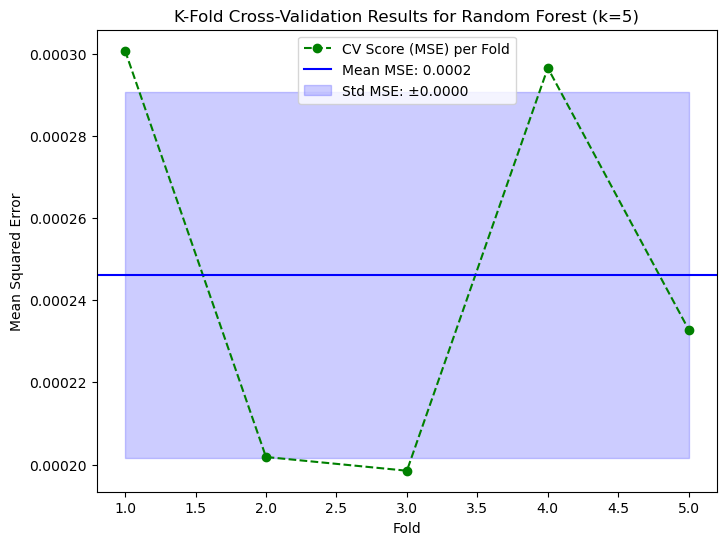

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Perform K-Fold Cross-Validation for the Random Forest Model
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
rf_cv_scores = np.abs(rf_cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores for RF
rf_mean_cv_score = np.mean(rf_cv_scores)
rf_std_cv_score = np.std(rf_cv_scores)

# Plotting the cross-validation scores for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(range(1, k+1), rf_cv_scores, marker='o', linestyle='--', color='g', label="CV Score (MSE) per Fold")
plt.axhline(y=rf_mean_cv_score, color='b', linestyle='-', label=f"Mean MSE: {rf_mean_cv_score:.4f}")
plt.fill_between(range(1, k+1), 
                 rf_mean_cv_score - rf_std_cv_score, 
                 rf_mean_cv_score + rf_std_cv_score, 
                 color='b', alpha=0.2, label=f"Std MSE: ±{rf_std_cv_score:.4f}")

plt.title(f"K-Fold Cross-Validation Results for Random Forest (k={k})")
plt.xlabel("Fold")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


Shape of y_test: (8532, 3)
Shape of rf_predictions: (8532, 3)


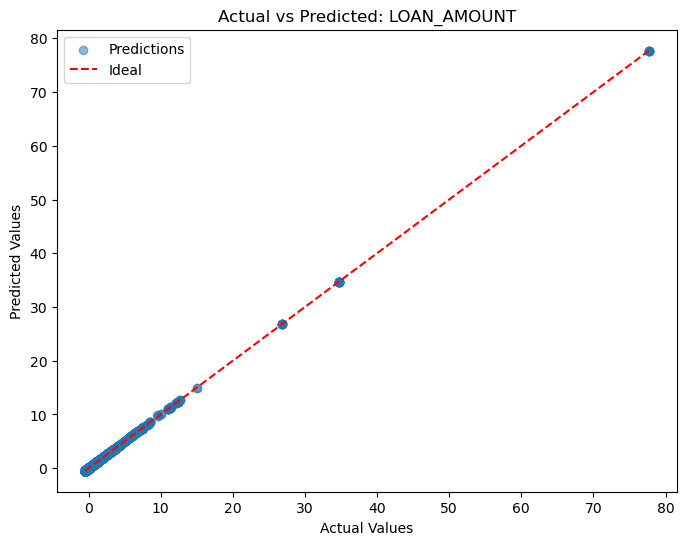

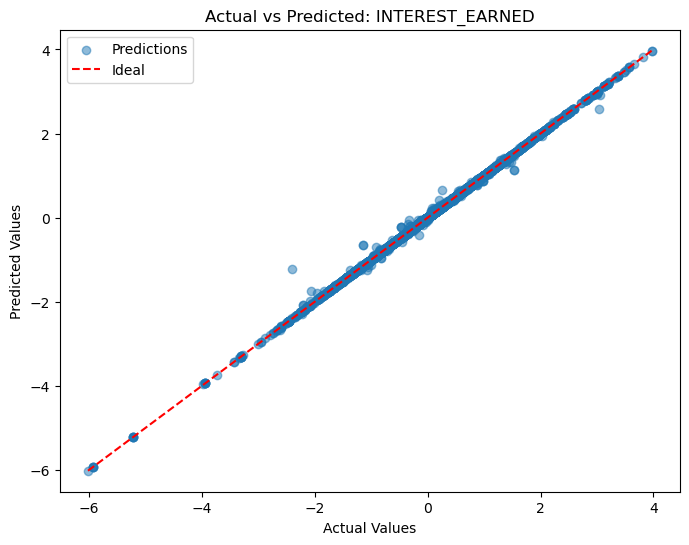

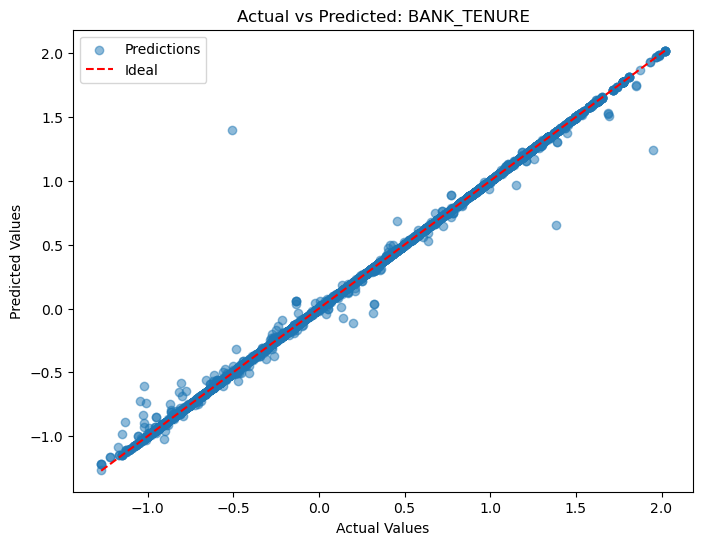

In [83]:

rf_model.fit(X_train, y_train)
# Ensure you generate predictions
rf_predictions = rf_model.predict(X_test)

# Check shapes before plotting
print("Shape of y_test:", y_test.shape)
print("Shape of rf_predictions:", rf_predictions.shape)

# Import required library for plotting
import matplotlib.pyplot as plt
import numpy as np

# Plot function
def plot_actual_vs_predicted(actual_values, predicted_values, target_names):
    """
    Plot actual vs predicted values for each target. Handles both single and multi-output targets.
    """
    # Ensure inputs are numpy arrays
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Check dimensions
    if len(actual_values.shape) == 1:
        actual_values = actual_values.reshape(-1, 1)
    if len(predicted_values.shape) == 1:
        predicted_values = predicted_values.reshape(-1, 1)

    # Ensure dimensions match
    assert actual_values.shape == predicted_values.shape, \
        "Shapes of actual and predicted values do not match!"

    # Iterate over targets for multi-output regression
    n_targets = actual_values.shape[1]
    for i in range(n_targets):
        target_name = target_names[i] if i < len(target_names) else f"Target {i+1}"
        
        plt.figure(figsize=(8, 6))
        plt.scatter(actual_values[:, i], predicted_values[:, i], alpha=0.5, label="Predictions")
        plt.plot([actual_values[:, i].min(), actual_values[:, i].max()],
                 [actual_values[:, i].min(), actual_values[:, i].max()],
                 color='red', linestyle='--', label="Ideal")
        plt.title(f"Actual vs Predicted: {target_name}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.legend()
        plt.show()

# Plot results
plot_actual_vs_predicted(y_test, rf_predictions, target_columns)


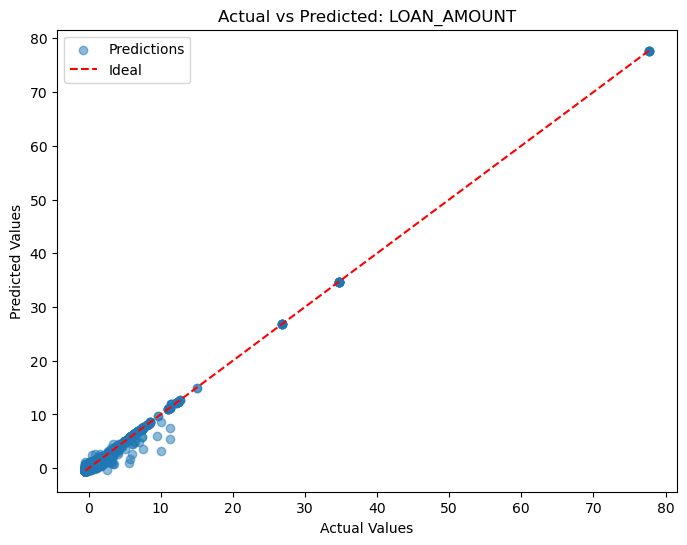

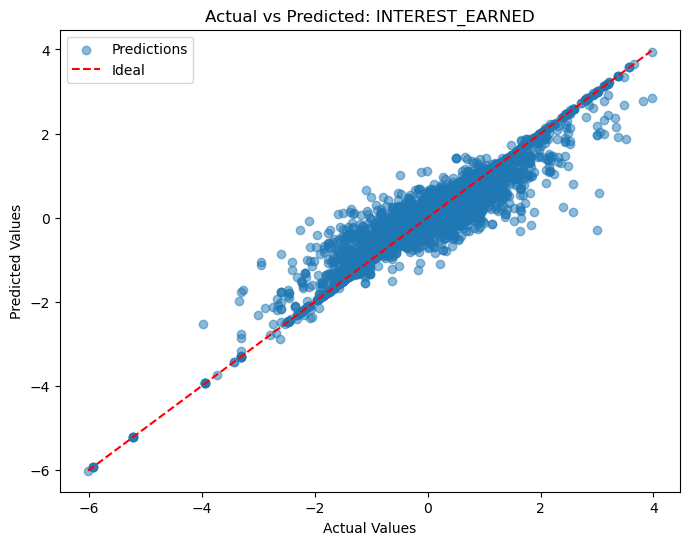

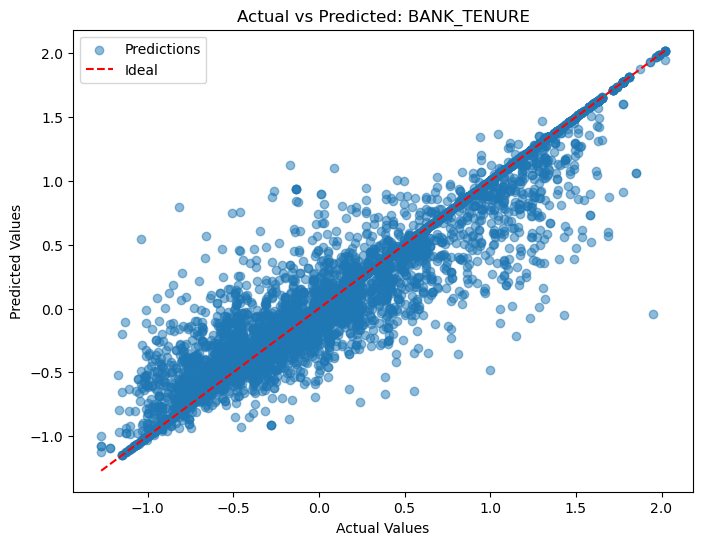

In [84]:

best_knn.fit(X_train, y_train)
# Ensure you generate predictions
knn_predictions = best_knn.predict(X_test)

# Import required library for plotting
import matplotlib.pyplot as plt
import numpy as np

# Plot function
def plot_actual_vs_predicted(actual_values, predicted_values, target_names):
    """
    Plot actual vs predicted values for each target. Handles both single and multi-output targets.
    """
    # Ensure inputs are numpy arrays
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Check dimensions
    if len(actual_values.shape) == 1:
        actual_values = actual_values.reshape(-1, 1)
    if len(predicted_values.shape) == 1:
        predicted_values = predicted_values.reshape(-1, 1)

    # Ensure dimensions match
    assert actual_values.shape == predicted_values.shape, \
        "Shapes of actual and predicted values do not match!"

    # Iterate over targets for multi-output regression
    n_targets = actual_values.shape[1]
    for i in range(n_targets):
        target_name = target_names[i] if i < len(target_names) else f"Target {i+1}"
        
        plt.figure(figsize=(8, 6))
        plt.scatter(actual_values[:, i], predicted_values[:, i], alpha=0.5, label="Predictions")
        plt.plot([actual_values[:, i].min(), actual_values[:, i].max()],
                 [actual_values[:, i].min(), actual_values[:, i].max()],
                 color='red', linestyle='--', label="Ideal")
        plt.title(f"Actual vs Predicted: {target_name}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.legend()
        plt.show()

# Plot results
plot_actual_vs_predicted(y_test, knn_predictions, target_columns)
